<a href="https://colab.research.google.com/github/lucasnbd/1TSCG-DbSuporte/blob/main/Airline_RM552092_Lucas_RM98833_Silvia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SILVIA CARNEIRO RM98833 E LUCAS NAKANISHI BECK DEPIERI RM552092

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

df = pd.read_csv('/content/AirlineReviews.csv')
df_novo = pd.read_csv('/content/AirlineReviews.csv')
df.head(5)

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


### i. Transforme a variável CountryOrigin em 3 dummies indicando se a origem é “UnitedStates” ou “UnitedKingdom” ou qualquer outro valor

In [ ]:
#classificando de 1 a 3
df['OriginCountry'] = df.apply(lambda row: 1 if row['OriginCountry'] == 'UnitedStates'
                               else (2 if row['OriginCountry'] == 'UnitedKingdom' else 3), axis=1)

print(df['OriginCountry'].value_counts())

OriginCountry
3    67328
1    39807
2    22320
Name: count, dtype: int64


### ii. Retire do modelo qualquer coluna que tenha mais de 10% de valores nulos.

In [ ]:
#calculando percentual para encontrar nulos acima de 10%
percent_null = df.isnull().mean() * 100
print(percent_null)

Aircraft               71.864354
AirlineName             0.000000
CabinType               2.331312
DateFlown              29.710710
DatePub                 0.000000
EntertainmentRating     0.000000
FoodRating              0.000000
GroundServiceRating     0.000000
OriginCountry           0.000000
OverallScore            3.345564
Recommended             0.000000
Review                  0.636515
Route                  29.840485
SeatComfortRating       0.000000
ServiceRating           0.000000
Slug                    0.000000
Title                   0.003090
TravelType             29.592522
TripVerified           54.031903
ValueRating             0.000000
WifiRating              0.000000
unique_id               0.000000
dtype: float64


In [ ]:
threshold = len(df) * 0.9

#filtra as colunas que têm mais de 10% de valores nulos
df = df.dropna(axis=1, thresh=threshold)

In [ ]:
#resultado
percent_null = df.isnull().mean() * 100
print(percent_null)

AirlineName            0.000000
CabinType              2.331312
DatePub                0.000000
EntertainmentRating    0.000000
FoodRating             0.000000
GroundServiceRating    0.000000
OriginCountry          0.000000
OverallScore           3.345564
Recommended            0.000000
Review                 0.636515
SeatComfortRating      0.000000
ServiceRating          0.000000
Slug                   0.000000
Title                  0.003090
ValueRating            0.000000
WifiRating             0.000000
unique_id              0.000000
dtype: float64


### iii. Transforme o OveralScore de uma escala de 1 à 10 em uma escala de 1 à 5, arredondando sem casas decimais.


In [ ]:
#tive que dropar nulos dessa coluna, pois havia 3.34% nulo
#era necessário dropar para fazer a conta, pq não aceita valores nulos no lambda
df.dropna(subset=['OverallScore'], inplace=True)

In [ ]:
#dividindo por 2 para transformar a escala corretamente e deixando o máximo 1, para não ter resultado 0
df['OverallScore'] = df['OverallScore'].apply(lambda x: max(1, round(x / 2)))

In [ ]:
print(df['OverallScore'].value_counts())

OverallScore
1    56298
4    31855
2    17977
5    14582
3     4412
Name: count, dtype: int64


### iv. Descarte qualquer outra coluna da tabela que não tenha sido citada.

In [ ]:
#colunas que foram introduzidas no pdf, separando corretamente
columns = [
    'AirlineName',
    'CabinType',
    'FoodRating',
    'GroundServiceRating',
    'OriginCountry',
    'EntertainmentRating',
    'OverallScore',
    'Recommended',
    'ValueRating',
    'ServiceRating',
    'SeatComfortRating',
]
df = df[columns]

### v. Criar um modelo preditivo que encontre o OveralScore do cliente, a partir de todas as demais informações.

In [ ]:
df.head(10)

,AirlineName,CabinType,FoodRating,GroundServiceRating,OriginCountry,EntertainmentRating,OverallScore,Recommended,ValueRating,ServiceRating,SeatComfortRating
0,AB Aviation,Economy Class,4,4,3,0,4,yes,3,5,4
1,AB Aviation,Economy Class,1,1,2,0,1,no,2,2,2
2,AB Aviation,Economy Class,1,1,2,0,1,no,2,1,2
3,Aerocaribbean,Economy Class,0,0,3,0,4,yes,4,0,0
4,Aerocaribbean,NaN,0,0,2,0,1,no,0,0,0
5,Aerocaribbean,NaN,0,0,3,0,1,no,0,0,0
6,AeroItalia,Economy Class,1,1,3,0,1,no,1,3,1
7,Aero VIP,Economy Class,0,5,3,0,4,yes,4,4,4
8,Aero VIP,Economy Class,0,5,3,0,4,yes,4,5,4
9,Aero VIP,Economy Class,0,3,3,0,4,yes,3,2,4


In [ ]:
#Contagem dos valores para conseguir pegar a classificação mais relevante do dataset, como american airlines e economy class

airline_count = df['AirlineName'].value_counts()
print("Contagem de valores em 'Airline':")
print(airline_count)

cabin_counts = df['CabinType'].value_counts()
print("Contagem de valores em 'Cabin':")
print(cabin_counts)

Contagem de valores em 'Airline':
AirlineName
American Airlines    5504
Spirit Airlines      4805
United Airlines      4505
British Airways      3536
Frontier Airlines    2966
                     ... 
Sol Líneas Aéreas       1
Air Cote d'Ivoire       1
NextJet                 1
Sudan Airways           1
Novair                  1
Name: count, Length: 547, dtype: int64
Contagem de valores em 'Cabin':
CabinType
Economy Class      99652
Business Class     16265
Premium Economy     4759
First Class         2381
Name: count, dtype: int64


In [ ]:
#aqui estou fazendo a alteração necessária para não deixar em string e pegar o dado mais relevante
df['AirlineName'] = df.apply(lambda row: 1 if row['AirlineName'] == 'American Airlines' else 0, axis=1)
df['CabinType'] = df.apply(lambda row: 1 if row['CabinType'] == 'Economy Class' else 0, axis=1)
df['Recommended'] = df.apply(lambda row: 1 if row['Recommended'] == 'yes' else 0, axis=1)

In [ ]:
df

,AirlineName,CabinType,FoodRating,GroundServiceRating,OriginCountry,EntertainmentRating,OverallScore,Recommended,ValueRating,ServiceRating,SeatComfortRating
0,0,1,4,4,3,0,4,1,3,5,4
1,0,1,1,1,2,0,1,0,2,2,2
2,0,1,1,1,2,0,1,0,2,1,2
3,0,1,0,0,3,0,4,1,4,0,0
4,0,0,0,0,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
129448,0,1,0,0,2,0,4,1,4,0,0
129449,0,1,0,0,1,0,5,1,4,0,0
129451,0,1,0,0,3,0,4,1,4,0,0
129453,0,1,0,0,3,0,2,1,4,0,0


In [ ]:
#preparação do modelo preditivo
x = df.drop('OverallScore', axis='columns')
y = df['OverallScore']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### vi. O modelo preditivo deve ser DT, RF, LDA ou QDA. Determine o melhor modelo baseando-se na acurácia. Considere as seguintes faixas de hiperparâmetros:
1. max_depth: 5 - 20
2. min_samples_leaf: 2 - 20
3. criterion: gini e log_loss
4. n_estimators: 70 - 130
5. random_state: valor fixo
6. solver: svd ou lsqr
7. shrinkage: 0 ou 1


#### RANDOM FOREST E DECISION TREE

In [ ]:
#Parametrôs e resultados da acurácia do RANDOM FOREST
param_grid_rf = {
    'n_estimators': [10, 30, 50],
    'max_depth': range(5, 10, 20),
    'min_samples_leaf': range(2, 10, 20),
    'criterion': ['gini', 'log_loss'],
    'random_state': [42]
}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, scoring='accuracy')
gs_rf.fit(x, y)
print(gs_rf.score(x, y))
best_estimator_rf = gs_rf.best_estimator_

0.7662239058853617


In [ ]:
#Parametrôs e resultados da acurácia do Decision Tree Classifier
param_grid_dt = {
    'max_depth': range(5, 10, 20),
    'min_samples_leaf': range(2, 10, 20),
    'criterion': ['gini', 'log_loss'],
    'random_state': [42]
}

gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, scoring='accuracy')
gs_dt.fit(x, y)
print(gs_dt.score(x, y))
best_estimator_dt = gs_dt.best_estimator_

0.763570538026278


#### LDA E QDA

In [ ]:
#Normalização do dataset para prosseguir com LDA e QDA
def normalizar(x):
  return (x - np.min(x))/(np.max(x)- np.min(x))

def padronizar (x):
  return(x - np.mean(x))/np.std(x)

In [ ]:
import pandas as pd
from scipy.stats import shapiro
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns
import statsmodels.api as sm

def verifica_normalidade(dataframe, coluna):

    coluna_data = dataframe[coluna]

    statistic, p_valor = shapiro(coluna_data)

    nivel_significancia = 0.05

    if p_valor > nivel_significancia:

        print(f"A coluna '{coluna}' segue uma distribuição normal (p-valor: {p_valor}).")

    else:

        print(f"A coluna '{coluna}' não segue uma distribuição normal (p-valor: {p_valor}).")

# Chamando a função para verificar normalidade

for coluna in ['AirlineName',
    'CabinType',
    'FoodRating',
    'GroundServiceRating',
    'OriginCountry',
    'OverallScore',
    'Recommended',
    'ValueRating',
    'ServiceRating',
    'SeatComfortRating']:
  verifica_normalidade(df, coluna)

A coluna 'AirlineName' não segue uma distribuição normal (p-valor: 1.0422894449507048e-182).
A coluna 'CabinType' não segue uma distribuição normal (p-valor: 3.26465826663002e-167).
A coluna 'FoodRating' não segue uma distribuição normal (p-valor: 2.9095358275957814e-125).
A coluna 'GroundServiceRating' não segue uma distribuição normal (p-valor: 2.670866477016376e-135).
A coluna 'OriginCountry' não segue uma distribuição normal (p-valor: 3.827377731497797e-148).
A coluna 'OverallScore' não segue uma distribuição normal (p-valor: 5.321553083380549e-140).
A coluna 'Recommended' não segue uma distribuição normal (p-valor: 3.325276244309344e-157).
A coluna 'ValueRating' não segue uma distribuição normal (p-valor: 2.3580828338665085e-132).
A coluna 'ServiceRating' não segue uma distribuição normal (p-valor: 2.4814383904369686e-123).
A coluna 'SeatComfortRating' não segue uma distribuição normal (p-valor: 2.328564438644089e-115).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 125124.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Chamando a função para verificar normalidade
for coluna in ['AirlineName',
    'CabinType',
    'FoodRating',
    'GroundServiceRating',
    'OriginCountry',
    'OverallScore',
    'Recommended',
    'EntertainmentRating',
    'ValueRating',
    'ServiceRating',
    'SeatComfortRating']:
  if verifica_normalidade(df, coluna):
    df[coluna] = padronizar(df[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    df[coluna] = normalizar(df[coluna])

df

A coluna 'AirlineName' não segue uma distribuição normal (p-valor: 1.0422894449507048e-182).
A coluna 'CabinType' não segue uma distribuição normal (p-valor: 3.26465826663002e-167).
A coluna 'FoodRating' não segue uma distribuição normal (p-valor: 2.9095358275957814e-125).
A coluna 'GroundServiceRating' não segue uma distribuição normal (p-valor: 2.670866477016376e-135).
A coluna 'OriginCountry' não segue uma distribuição normal (p-valor: 3.827377731497797e-148).
A coluna 'OverallScore' não segue uma distribuição normal (p-valor: 5.321553083380549e-140).
A coluna 'Recommended' não segue uma distribuição normal (p-valor: 3.325276244309344e-157).
A coluna 'EntertainmentRating' não segue uma distribuição normal (p-valor: 2.125728579471331e-136).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 125124.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 125124.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 125124.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 125124.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: sc

A coluna 'ValueRating' não segue uma distribuição normal (p-valor: 2.3580828338665085e-132).
A coluna 'ServiceRating' não segue uma distribuição normal (p-valor: 2.4814383904369686e-123).
A coluna 'SeatComfortRating' não segue uma distribuição normal (p-valor: 2.328564438644089e-115).


,AirlineName,CabinType,FoodRating,GroundServiceRating,OriginCountry,EntertainmentRating,OverallScore,Recommended,ValueRating,ServiceRating,SeatComfortRating
0,0.0,1.0,0.8,0.8,1.0,0.0,0.75,1.0,0.6,1.0,0.8
1,0.0,1.0,0.2,0.2,0.5,0.0,0.00,0.0,0.4,0.4,0.4
2,0.0,1.0,0.2,0.2,0.5,0.0,0.00,0.0,0.4,0.2,0.4
3,0.0,1.0,0.0,0.0,1.0,0.0,0.75,1.0,0.8,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
129448,0.0,1.0,0.0,0.0,0.5,0.0,0.75,1.0,0.8,0.0,0.0
129449,0.0,1.0,0.0,0.0,0.0,0.0,1.00,1.0,0.8,0.0,0.0
129451,0.0,1.0,0.0,0.0,1.0,0.0,0.75,1.0,0.8,0.0,0.0
129453,0.0,1.0,0.0,0.0,1.0,0.0,0.25,1.0,0.8,0.0,0.0


In [ ]:
#Troquei o x e o y para não causar confusão no código e poder utilizar o dataset padronizado.
x1 = df.drop('OverallScore', axis='columns')
y1 = df['OverallScore']
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
#Parametrôs e resultados da acurácia do LDA
model = LinearDiscriminantAnalysis(n_components=2, solver='svd')
model.fit(X_train1, y_train1)
Y_prev = model.predict(X_test1)
print(accuracy_score(y_test1, Y_prev))

model = LinearDiscriminantAnalysis(n_components=2, solver='lsqr', shrinkage=1)
model.fit(X_train1, y_train1)
Y_prev = model.predict(X_test1)
print(accuracy_score(y_test1, Y_prev))

0.7407691569962597
0.6618074869729229


In [ ]:
#Parametrôs e resultados da acurácia do QDA
model = QuadraticDiscriminantAnalysis()
model.fit(X_train1, y_train1)
Y_prev = model.predict(X_test1)
print(accuracy_score(y_test1, Y_prev))

model = QuadraticDiscriminantAnalysis()
model.fit(X_train1, y_train1)
Y_prev = model.predict(X_test1)
print(accuracy_score(y_test1, Y_prev))

0.7076180429014418
0.7076180429014418


### vii. Matriz de confusão do modelo escolhido.

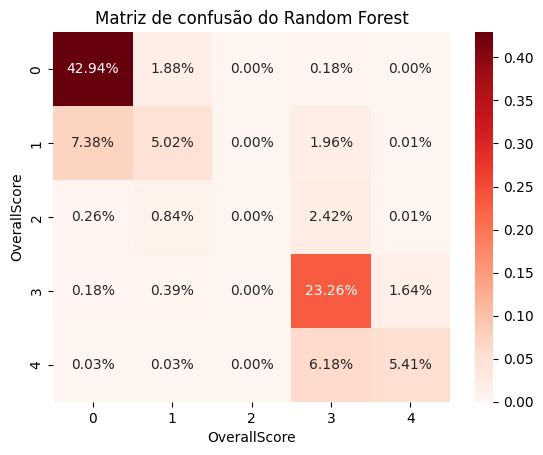

In [ ]:
#Matriz de confusão do Random Forest
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = best_estimator_rf.predict(x)
matrix = confusion_matrix(y, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')
plt.xlabel('OverallScore')
plt.ylabel('OverallScore')
plt.title('Matriz de confusão do Random Forest')
plt.show()

### viii. Responsa descritiva: explicação do que foi possível determinar a partir da matriz de confusão obtida.


In [ ]:
#Entendemos que no teste o modelo conseguiu acertar 43.07% de acerto no 1 para 1.
#Entendemos que foi capaz de acertar 23.50% no 4 para 4.
#Então determinamos que o modelo chegou na acurácia de 76% e em quais variações ele acertou e errou.

### x. Se o melhor modelo for uma RF, criar um gráfico de linha mostrando a evolução da acurácia em função do n_estimators.



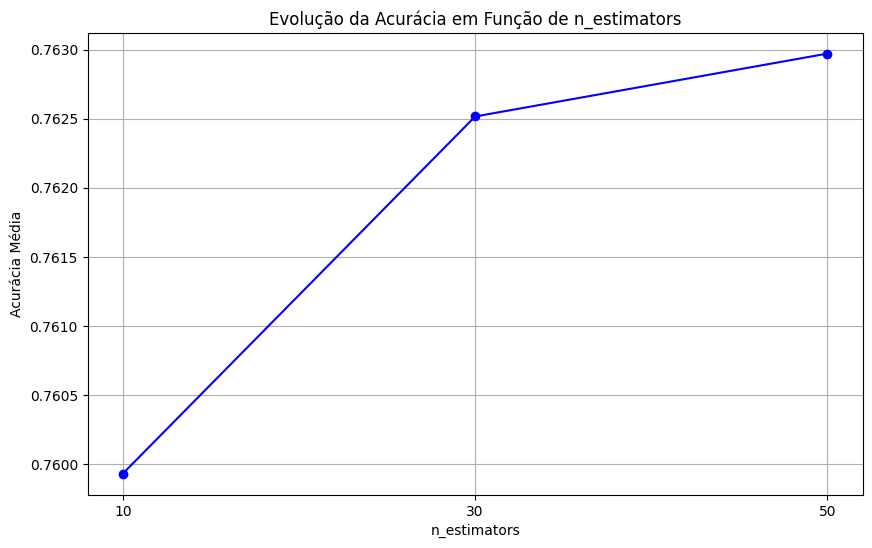

In [ ]:
results = gs_rf.cv_results_
param_name = 'n_estimators'

param_range = sorted(set(p[param_name] for p in results['params']))
mean_test_scores = []
for param in param_range:
    # Obter índices onde o parâmetro é igual ao valor atual
    indices = [i for i, p in enumerate(results['params']) if p[param_name] == param]
    # Calcular a média das acurácias para esses índices
    mean_score = np.mean([results['mean_test_score'][i] for i in indices])
    mean_test_scores.append(mean_score)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(param_range, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('n_estimators')
plt.ylabel('Acurácia Média')
plt.title('Evolução da Acurácia em Função de n_estimators')
plt.grid(True)
plt.xticks(param_range)
plt.show()

### xi. Execute novamente o item vi. dessa vez utilizando somente as variáveis FoodRating, EntertainmentRate, ValueRating, ServiceRating e SeatComfortRating. Houve melhoria perceptível na acurácia?


In [ ]:
#colunas que foram introduzidas na pergunta, separando corretamente
columns = [
    'EntertainmentRating',
    'ValueRating',
    'FoodRating',
    'ServiceRating',
    'SeatComfortRating',
    'OverallScore'
]
df1 = df_novo[columns]

In [ ]:
df1

,EntertainmentRating,ValueRating,FoodRating,ServiceRating,SeatComfortRating,OverallScore
0,0,3,4,5,4,9.0
1,0,2,1,2,2,1.0
2,0,2,1,1,2,1.0
3,0,4,0,0,0,8.0
4,0,0,0,0,0,1.0
...,...,...,...,...,...,...
129450,0,1,0,0,0,NaN
129451,0,4,0,0,0,8.0
129452,0,1,0,0,0,NaN
129453,0,4,0,0,0,5.0


In [ ]:
df1.dropna(subset=['OverallScore'], inplace=True)

<ipython-input-532-400345379126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['OverallScore'], inplace=True)


In [ ]:
df1['OverallScore'] = df1['OverallScore'].apply(lambda x: max(1, round(x / 2)))

<ipython-input-533-3a45df7f7cdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OverallScore'] = df1['OverallScore'].apply(lambda x: max(1, round(x / 2)))


In [ ]:
#preparação do modelo preditivo
x = df1.drop('OverallScore', axis='columns')
y = df1['OverallScore']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
#Parametrôs e resultados da acurácia do RANDOM FOREST COM A ALTERAÇÃO PROPOSTA
param_grid_rf_novo = {
    'n_estimators': [10, 30, 50],
    'max_depth': range(5, 10, 20),
    'min_samples_leaf': range(2, 10, 20),
    'criterion': ['gini', 'log_loss'],
    'random_state': [42]
}

gs_rf_novo = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf_novo, scoring='accuracy')
gs_rf_novo.fit(x, y)
print(gs_rf_novo.score(x, y))
best_estimator_rf_novo = gs_rf_novo.best_estimator_

#Podemos ver que piorou um pouco, mas continua bom

0.7426233176688725
